### K-Means

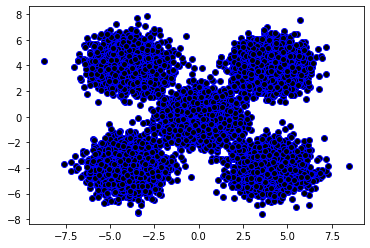

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np

np.random.seed(13)

x, y = make_blobs(n_samples=10000, centers=[[-4, -4], [-4, 4], [4, 4], [4, -4], [0, 0]])

plt.scatter(x[:, 0], x[:, 1], color='k', edgecolor="b")

For more detail see <a href=https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>here</a>

In [2]:
from sklearn.cluster import KMeans

np.random.seed(13)

clf = KMeans(n_clusters=5, init='k-means++', max_iter=100, n_init=10)
clf.fit(x)

KMeans(max_iter=100, n_clusters=5)

Be warn that this is a unsuperwised learning algorithm, so our model object has not prediction method like clf.predict. the result of clf.fit() is an array containing lables of every record with tow dimensions, accessible by clf.lables_ and it's centers by clf.cluster_centers_

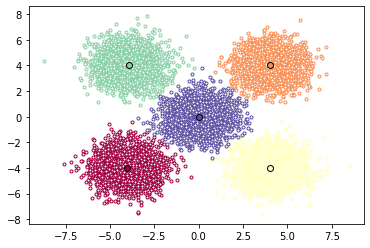

In [3]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(clf.cluster_centers_)))

for i in range(len(clf.cluster_centers_)):
    
    current_cluster_members = clf.labels_==i
    # Plot cluster's members
    plt.scatter(x[current_cluster_members, 0], x[current_cluster_members, 1], color='w', edgecolors=colors[i], marker='.')

    # Plot center of cluster
    plt.scatter(clf.cluster_centers_[i, 0], clf.cluster_centers_[i, 1], color=colors[i], edgecolors='k')

plt.show()

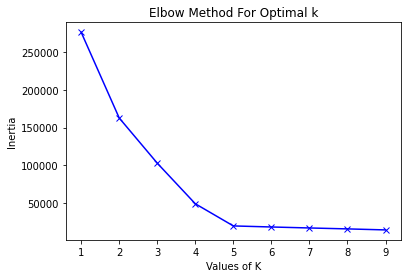

In [4]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
    clf = KMeans(n_clusters=num_clusters)
    clf.fit(x)
    Sum_of_squared_distances.append(clf.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

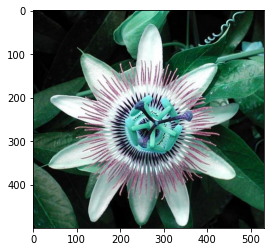

In [5]:
import cv2

img = cv2.imread('data/flowers/image_00017.jpg')
first_shape = img.shape
plt.imshow(img)

In [6]:
img = img.reshape((-1, 3))
img.shape

(265500, 3)

In [7]:
np.random.seed(13)

clf = KMeans(n_clusters=4, init='k-means++', max_iter=100, n_init=10)
clf.fit(img)

KMeans(max_iter=100, n_clusters=4)

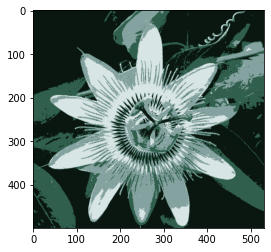

In [8]:
y_lables = np.array(clf.labels_)
for i in range(len(set(y_lables))):
    cluster = y_lables==i
    img[cluster] = clf.cluster_centers_[i]

img = img.reshape(first_shape)
plt.imshow(img)

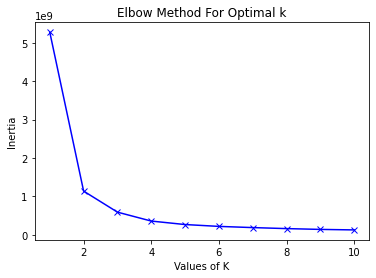

In [9]:
img = cv2.imread('data/flowers/image_00017.jpg')
img = img.reshape((-1, 3))

Sum_of_squared_distances = []
K = range(1,11)
for num_clusters in K:
    clf = KMeans(n_clusters=num_clusters)
    clf.fit(img)
    Sum_of_squared_distances.append(clf.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
from sklearn.datasets import load_digits

x, y = load_digits(return_X_y=True)
x.shape

(1797, 64)

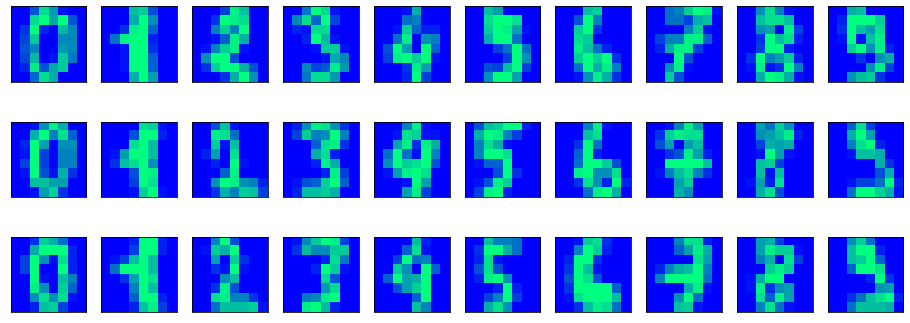

In [11]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i+1, xticks=[], yticks=[])
    ax.imshow(x[i].reshape(8, 8).astype('uint8'), cmap=plt.cm.winter)

In [12]:
from sklearn.cluster import KMeans

np.random.seed(13)

clf = KMeans(n_clusters=10, init='k-means++', max_iter=100, n_init=10)
clf.fit(x)

KMeans(max_iter=100, n_clusters=10)

In [13]:
from sklearn.metrics import rand_score

rand_score(clf.labels_, y)

0.9333261449111548

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)
clf = KMeans(init="k-means++", n_clusters=10, n_init=4)
clf.fit(x_pca)

rand_score(clf.labels_, y)

0.8889518908648787

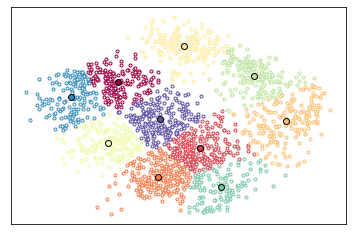

In [15]:
colors = plt.cm.Spectral(np.linspace(0, 1, len(clf.cluster_centers_)))

for i in range(len(clf.cluster_centers_)):
    
    current_cluster_members = clf.labels_ == i
    # Plot cluster's members
    plt.scatter(x_pca[current_cluster_members, 0], x_pca[current_cluster_members, 1], color='w', edgecolors=colors[i], marker='.')

    # Plot center of cluster
    plt.scatter(clf.cluster_centers_[i, 0], clf.cluster_centers_[i, 1], color=colors[i], edgecolors='k')

plt.xticks(())
plt.yticks(())
plt.show()

### DBSCAN

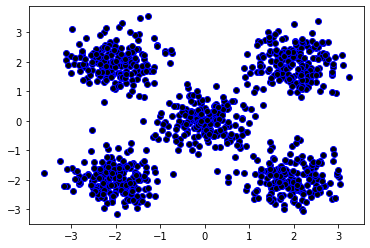

In [16]:
np.random.seed(13)

x, y = make_blobs(n_samples=1000, centers=[[-2, -2], [-2, 2], [2, 2], [2, -2], [0, 0]], cluster_std=0.5)

plt.scatter(x[:, 0], x[:, 1], color='k', edgecolor="b")

For more details see <a href=https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html>here</a>

In [17]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=0.3, min_samples=7)
clf.fit(x)

DBSCAN(eps=0.3, min_samples=7)

### Visualize clusters and outliers

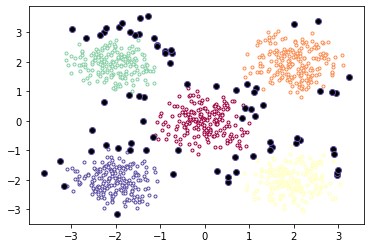

In [18]:
colors = plt.cm.Spectral(np.linspace(0, 1, 5))

for i in range(5):
    current_cluster_members = clf.labels_==i
    # Plot cluster's members
    plt.scatter(x[current_cluster_members, 0], x[current_cluster_members, 1], color='w', edgecolors=colors[i], marker='.')

current_cluster_members = clf.labels_==-1
plt.scatter(x[current_cluster_members, 0], x[current_cluster_members, 1], color='k', edgecolors=colors[i])
plt.show()

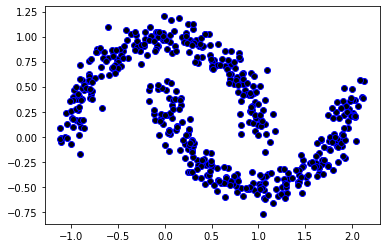

In [19]:
from sklearn.datasets import make_moons

np.random.seed(0)

x, y = make_moons(n_samples=500, shuffle=True, noise=0.09)

plt.scatter(x[:, 0], x[:, 1], color='k', edgecolor="b")

In [20]:
clf = DBSCAN(eps=0.15, min_samples=5)
clf.fit(x)

DBSCAN(eps=0.15)

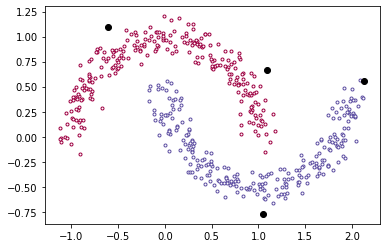

In [21]:
classes = len(set(clf.labels_)) - 1 if -1 in set(clf.labels_) else len(set(clf.labels_))
colors = plt.cm.Spectral(np.linspace(0, 1, classes))


for i in range(classes):
    current_cluster_members = clf.labels_==i
    # Plot cluster's members
    plt.scatter(x[current_cluster_members, 0], x[current_cluster_members, 1], color='w', edgecolors=colors[i], marker='.')

current_cluster_members = clf.labels_==-1
plt.scatter(x[current_cluster_members, 0], x[current_cluster_members, 1], color='k', edgecolors='k')
plt.show()

In [2]:
import pandas as pd

bdf = pd.read_csv('data/creditcard.csv').drop(columns=['Time'])
bdf.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,'0'
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,'0'
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,'0'
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,'0'
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,'0'


<AxesSubplot:ylabel='Class'>

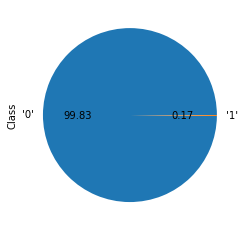

In [3]:
target = 'Class'
bdf[target].value_counts().plot.pie(autopct='%.2f')

In [4]:
from sklearn.preprocessing import StandardScaler

scaller = StandardScaler()
df = scaller.fit_transform(bdf.drop('Class', axis=1))
df = pd.DataFrame(df)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [5]:
x = df
y = bdf.Class

from sklearn.decomposition import PCA

pca = PCA(0.7)
x_pca = pca.fit_transform(x)

Text(0, 0.5, 'Explained variance')

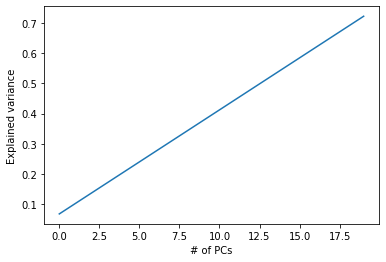

In [6]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("# of PCs")
plt.ylabel("Explained variance")

In [7]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=2, min_samples=2)
clf.fit(x_pca)

DBSCAN(eps=2, min_samples=2)

In [11]:
y = y.apply(lambda x : 1 if x=="'1'" else 0)

In [14]:
pd.DataFrame(y).value_counts()

Class
0        284315
1           492
dtype: int64

In [15]:
from sklearn import metrics
y_pred = clf.labels_

y_pred[y_pred != -1] = 0
y_pred[y_pred == -1] = 1

print("Accuracy: ", metrics.accuracy_score(y, y_pred))

print()
print("Confusion matrix:")
print(metrics.confusion_matrix(y, y_pred))

print()
print("Classification report:")
print(metrics.classification_report(y, y_pred))

Accuracy:  0.934548659267504

Confusion matrix:
[[265868  18447]
 [   194    298]]

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97    284315
           1       0.02      0.61      0.03       492

    accuracy                           0.93    284807
   macro avg       0.51      0.77      0.50    284807
weighted avg       1.00      0.93      0.96    284807

